In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sbn


TRAIN_PATH = "/content/drive/My Drive/Colab Notebooks/kaggle_challenge_dataset/dataset.csv"
TEST_PATH = "/content/drive/My Drive/Colab Notebooks/kaggle_challenge_dataset/test_dataset.csv"

In [0]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [0]:
y = train_df['fare_amount']
X = train_df.drop(columns=['fare_amount'])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42468944, 7)
(10617237, 7)
(42468944,)
(10617237,)


In [8]:
#model1: linear regression
from sklearn.linear_model import LinearRegression

model1_LinReg = LinearRegression(normalize = True).fit(X_train, y_train)
y_pred1 = model1_LinReg.predict(X_test)
y_pred_final = model1_LinReg.predict(test_df)
print("X_CV RMSE: %.3f" % mean_squared_error(y_test, y_pred1) ** 0.5)

'''
submission = pd.DataFrame(
    {'key': test_temp.key, 'fare_amount': y_pred_final},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)
'''

X_CV RMSE: 5.204


"\nsubmission = pd.DataFrame(\n    {'key': test_temp.key, 'fare_amount': y_pred_final},\n    columns = ['key', 'fare_amount'])\nsubmission.to_csv('submission.csv', index = False)\n"

In [15]:
import pickle
from sklearn.externals import joblib

# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/kaggle_challenge_dataset/finalized_lin_reg_model.sav'
joblib.dump(model1_LinReg, filename)

['/content/drive/My Drive/Colab Notebooks/kaggle_challenge_dataset/finalized_lin_reg_model.sav']

In [16]:
# load the model from disk
loaded_model_lin_reg = joblib.load(filename)
result = loaded_model_lin_reg.predict(test_df[0:5])
print(result)

[10.60416478 11.061236    5.32776582  9.23526979 14.23195987]


In [12]:
#model 2: Light GBM
import lightgbm as lgb

params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }

evals_result = {}

train_set = lgb.Dataset(X_train, y_train)
test_set = lgb.Dataset(X_test, y_test)
model2_lb = lgb.train(params, train_set = train_set, valid_sets = train_set, num_boost_round=800, evals_result=evals_result)
y_pred2 = model2_lb.predict(X_test, num_iteration = model2_lb.best_iteration)
print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred2) ** 0.5)

y_pred_final_lgbm = model2_lb.predict(test_df[0:5])

[1]	training's rmse: 4.85682
[2]	training's rmse: 4.2046
[3]	training's rmse: 4.07607
[4]	training's rmse: 4.02118
[5]	training's rmse: 3.9685
[6]	training's rmse: 3.91713
[7]	training's rmse: 3.87921
[8]	training's rmse: 3.85051
[9]	training's rmse: 3.82423
[10]	training's rmse: 3.81517
[11]	training's rmse: 3.80791
[12]	training's rmse: 3.77605
[13]	training's rmse: 3.75741
[14]	training's rmse: 3.73935
[15]	training's rmse: 3.72688
[16]	training's rmse: 3.72294
[17]	training's rmse: 3.72047
[18]	training's rmse: 3.69853
[19]	training's rmse: 3.69623
[20]	training's rmse: 3.69401
[21]	training's rmse: 3.67308
[22]	training's rmse: 3.6635
[23]	training's rmse: 3.65639
[24]	training's rmse: 3.64152
[25]	training's rmse: 3.63183
[26]	training's rmse: 3.62748
[27]	training's rmse: 3.62347
[28]	training's rmse: 3.62035
[29]	training's rmse: 3.61581
[30]	training's rmse: 3.60888
[31]	training's rmse: 3.60547
[32]	training's rmse: 3.60258
[33]	training's rmse: 3.59785
[34]	training's rmse: 

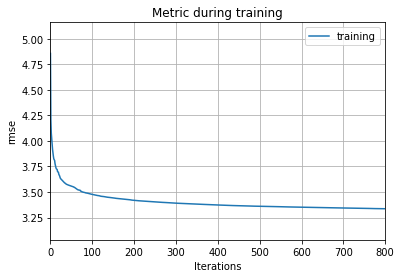

In [13]:
lgb.plot_metric(evals_result)

In [17]:
# save the model to disk
filename = 'finalized_lgbm_model.sav'
joblib.dump(model2_lb, filename)

['finalized_lgbm_model.sav']

In [19]:
#to see if the saved models is working properly
loaded_model_lgbm = joblib.load(filename)
result = loaded_model_lgbm.predict(test_df[0:5])
print(result)

[ 9.69759028 10.55673787  5.57671229  8.29006302 15.71650513]
